In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

# Import Traffic

In [2]:
df_traf_i70 = pd.DataFrame.from_csv('data/i70_after_vail.csv', index_col = 27, parse_dates= True)

IOError: File data/i70_after_vail.csv does not exist

In [ ]:
df_traf_i70.head()

In [ ]:
df_traf_i70.drop(['COUNTSTATIONID','COUNTDATE'], inplace = True, axis = 1)

In [ ]:
df_traf_i70_ski = choose_date_range(2014, 10, 31, 2015, 6, 15, df_traf_i70)

In [ ]:
df_traf_i70_ski.head()

In [ ]:
df_traf_ski_prim, df_traf_ski_sec = separate_traffic_directions(df_traf_i70_ski)

In [ ]:
df_traf_ski_sec.tail()

In [ ]:
df_traf_ski_prim, df_traf_ski_sec = sum_morning_evening_and_drop_hourly(df_traf_ski_prim, df_traf_ski_sec)

In [ ]:
df_traf_ski_prim.tail()

In [ ]:
df_traf_ski_prim['all_day_east'] = df_traf_ski_prim.morning_east + df_traf_ski_prim.evening_east
df_traf_ski_sec['all_day_west'] = df_traf_ski_sec.morning_west + df_traf_ski_sec.evening_west

In [ ]:
df_traf_ski_all = df_traf_ski_prim
df_traf_ski_all['morning_west'] = df_traf_ski_sec.morning_west 
df_traf_ski_all['evening_west'] = df_traf_ski_sec.evening_west
df_traf_ski_all['all_day_west'] = df_traf_ski_sec.all_day_west 

In [ ]:
df_traf_ski_all = df_traf_ski_all.drop('COUNTDIR', axis = 1)

In [ ]:
df_traf_ski_all.head()

In [ ]:
df_traf_ski_plot = df_traf_ski_all.drop(['morning_east','evening_east', 'morning_west', 'evening_west'], axis = 1)

In [ ]:
df_traf_ski_plot.head()

In [ ]:
df_traf_ski_plot.plot(marker = 'o')

In [ ]:
df_traf_ski_plot = df_traf_ski_plot.rename(columns={'all_day_east':'all_day_west', 'all_day_west':'all_day_east'})

In [ ]:
df = df_traf_ski_plot

In [ ]:
df.to_csv('data/vail_clean.csv')

## Import Vail Traffic

In [149]:
df_vail = pd.DataFrame.from_csv('data/i70_after_vail_clean.csv')

In [150]:
df_vail = df_vail.rename(columns = {'all_day_east':'vail_eastbound', 'all_day_west':'vail_westbound'})

In [151]:
df_vail['cars'] = (df_vail.vail_eastbound + df_vail.vail_westbound)/2

In [152]:
norm = df_vail.cars.mean()

In [154]:
df_vail['skiers'] = df_vail.cars/norm

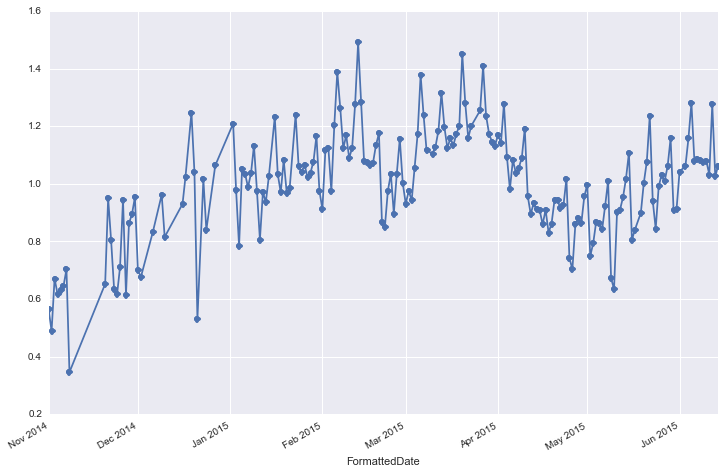

In [156]:
df_vail.skiers.plot(marker='o')

## Import Copper Data

In [308]:
df_i70_after_copper = pd.DataFrame.from_csv('data/i70_after_copper_clean.csv')

In [309]:
df_i70_after_copper.head()

,all_day_east,all_day_west
FormattedDate,,
2014-10-31,8389,9503
2014-11-01,7182,7772
2014-11-02,8009,7513
2014-11-03,6212,6518
2014-11-04,7132,6848


In [310]:
df_i70_after_copper = df_i70_after_copper.rename(columns = {'all_day_east':'before_copper_eastbound', 'all_day_west':'after_copper_westbound'})

In [311]:
len(df_i70_after_copper)

207

In [312]:
df_i70_after_copper.head()

,before_copper_eastbound,after_copper_westbound
FormattedDate,,
2014-10-31,8389,9503
2014-11-01,7182,7772
2014-11-02,8009,7513
2014-11-03,6212,6518
2014-11-04,7132,6848


## Import Idaho Springs Data

In [313]:
df_idaho_spr = pd.DataFrame.from_csv('data/idaho_springs_traffic_clean.csv')

In [314]:
df_idaho_spr = df_idaho_spr.rename(columns={'all_day_east':'id_spr_eastbound', 'all_day_west':'id_spr_westbound'})

In [315]:
df_idaho_spr.head()

,id_spr_eastbound,id_spr_westbound
FormattedDate,,
2014-10-31,16829,21126
2014-11-01,16823,19966
2014-11-02,18811,15289
2014-11-03,12781,13141
2014-11-04,14278,14230


### Import I-70 traffic after Eisenhower Tunnel

In [330]:
df_after_tunnel = pd.DataFrame.from_csv('data/i70_after_tunnel_clean.csv')

In [331]:
df_after_tunnel = df_after_tunnel.rename(columns = {'all_day_east':'tunnel_eastbound', 'all_day_west':'tunnel_westbound'})

In [332]:
df_after_tunnel.head()

,tunnel_eastbound,tunnel_westbound
FormattedDate,,
2014-10-31,11642,13302
2014-11-01,11058,13007
2014-11-02,13068,10752
2014-11-03,7653,9044
2014-11-04,5782,9291


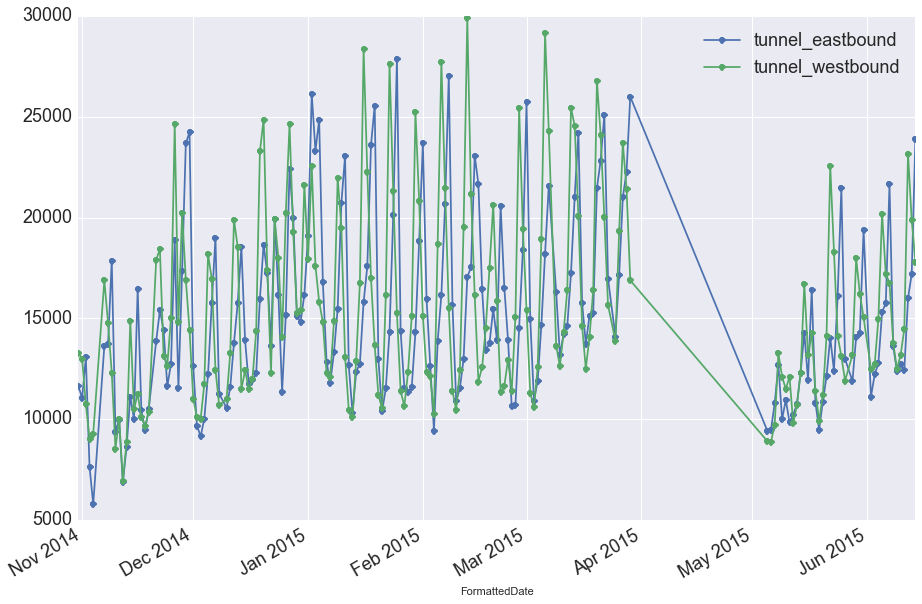

In [336]:
plot_two_lines(df_after_tunnel, 'tunnel_eastbound', 'tunnel_westbound', 'tunnel_eastbound', 'tunnel_westbound', None)

## Import Berthoud Pass Traffic

In [3]:
df_berthoud = pd.DataFrame.from_csv('data/berthoud_traffic_clean.csv')

In [4]:
df_berthoud = df_berthoud.rename(columns={'all_day_toward_i70':'berthoud_toward_i70', 'all_day_away_i70':'berthoud_away_i70'})

In [5]:
day_of_week = []
for idx, day in df_berthoud.iterrows():
    day_of_week.append(idx.weekday())
    
df_berthoud['day_of_week'] = day_of_week
#4 = Friday
#5 = Sat
#6 = Sun

In [6]:
df_berthoud['net_cars'] = df_berthoud.berthoud_away_i70 - df_berthoud.berthoud_toward_i70
df_berthoud['net_cars'] = df_berthoud['net_cars'].shift(1)
df_berthoud['net_cars'][0] = 5000

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [7]:
skiers = []
count = 0
for idx, row in df_berthoud.iterrows():
    count += row.net_cars
    skiers.append(count)

In [8]:
df_berthoud['skiers'] = skiers
df_berthoud['skiers'] = df_berthoud['skiers']/df_berthoud.skiers.mean()

In [9]:
df_berthoud.head()

,berthoud_toward_i70,berthoud_away_i70,day_of_week,net_cars,skiers
FormattedDate,,,,,
2014-10-31,1803,2822,4,5000,0.971232
2014-11-01,1938,2686,5,1019,1.169169
2014-11-02,2679,1379,6,748,1.314465
2014-11-03,1539,1290,0,-1300,1.061945
2014-11-04,1624,1529,1,-249,1.013577


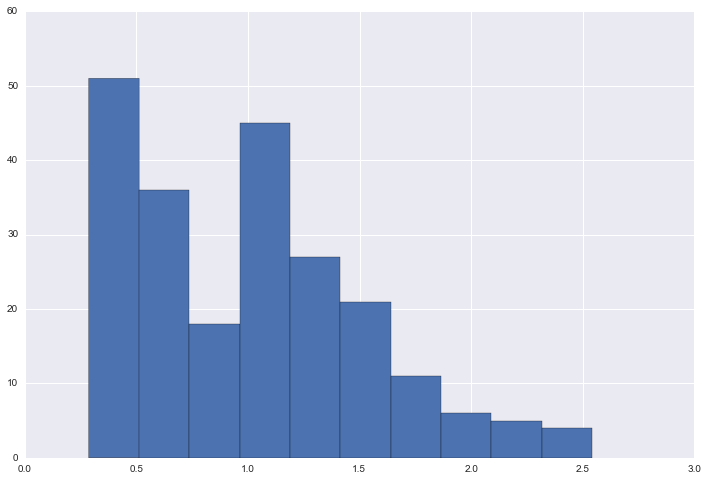

In [10]:
df_berthoud.skiers.hist()

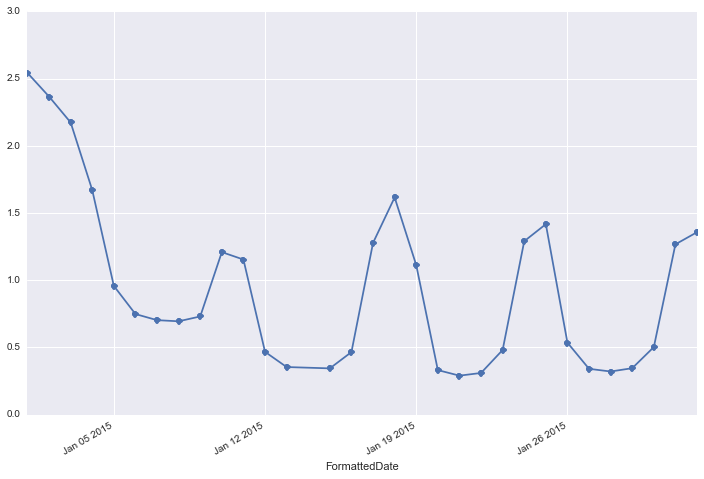

In [11]:
df_berthoud.skiers.plot(marker='o', xlim = ['2015-1-1 00:00:00', '2015-2-1 00:00:00'])
#closing day 4/26
#opening day 11/15

In [14]:
df_berthoud.drop(['net_cars'], axis=1, inplace=True)

In [15]:
df_berthoud.head()

,berthoud_toward_i70,berthoud_away_i70,day_of_week,skiers
FormattedDate,,,,
2014-10-31,1803,2822,4,0.971232
2014-11-01,1938,2686,5,1.169169
2014-11-02,2679,1379,6,1.314465
2014-11-03,1539,1290,0,1.061945
2014-11-04,1624,1529,1,1.013577


In [16]:
df_berthoud.to_csv('data/berthoud_skiers.csv')

## Import Breck Traffic Data

In [128]:
df_breck = pd.DataFrame.from_csv('data/breck_clean.csv')

In [129]:
df_breck = df_breck.rename(columns = {'all_day_east':'away_from_breck', 'all_day_west':'to_breck'})

In [130]:
df_breck.head()

,away_from_breck,to_breck
FormattedDate,,
2014-12-18,9551,10854
2014-12-19,10943,12741
2014-12-20,10377,12167
2014-12-21,8268,8434
2014-12-22,8378,8682


In [131]:
day_of_week = []
for idx, day in df_breck.iterrows():
    day_of_week.append(idx.weekday())
    
df_breck['day_of_week'] = day_of_week
#4 = Friday
#5 = Sat
#6 = Sun

In [132]:
df_breck['traffic'] = (df_breck.to_breck + df_breck.away_from_breck)/2

In [133]:
df_breck['skiers'] = df_breck.traffic/df_breck.traffic.mean()

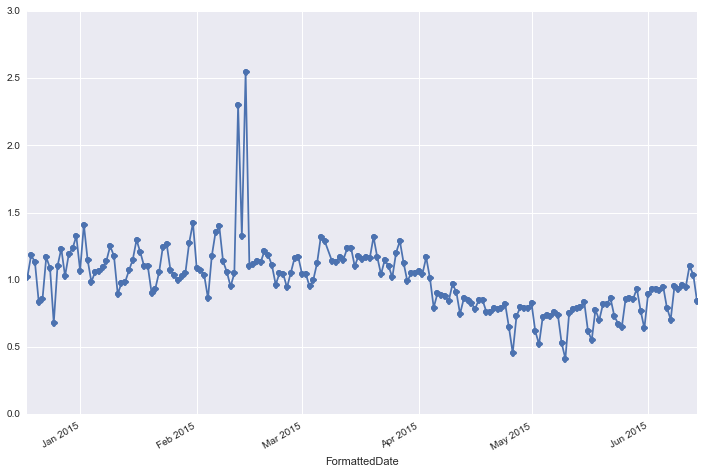

In [134]:
df_breck.skiers.plot(marker = 'o')

## Import the traffic data from I-70, west of Eagle

In [135]:
df_eagle = pd.DataFrame.from_csv('data/eagle_traffic_clean.csv')

In [136]:
df_eagle.head()

,all_day_east,all_day_west
FormattedDate,,
2014-10-31,11905,13083
2014-11-01,8769,9188
2014-11-02,8559,8160
2014-11-03,10565,10717
2014-11-04,11003,10766


In [137]:
df_eagle = df_eagle.rename(columns = {'all_day_east':'eagle_eastbound', 'all_day_west':'eagle_westbound'})

# Combine all of the summit county traffic data.

In [279]:
resamp_time = '1440Min'
df_summit = pd.concat([df_idaho_spr.resample(resamp_time), df_berthoud.resample(resamp_time), df_eagle.resample(resamp_time)], axis=1).dropna()
#df_all = pd.concat([df_idaho_spr.resample(resamp_time), df_berthoud.resample(resamp_time), df_after_tunnel.resample(resamp_time), df_breck.resample(resamp_time), df_i70_after_copper.resample(resamp_time), df_vail.resample(resamp_time), df_eagle.resample(resamp_time)], axis=1).dropna()

In [280]:
df_summit.head()

,id_spr_eastbound,id_spr_westbound,berthoud_toward_i70,berthoud_away_i70,day_of_week,net_cars,skiers,eagle_eastbound,eagle_westbound
FormattedDate,,,,,,,,,
2014-10-31,16829,21126,1803,2822,4,5000,0.971232,11905,13083
2014-11-01,16823,19966,1938,2686,5,1019,1.169169,8769,9188
2014-11-02,18811,15289,2679,1379,6,748,1.314465,8559,8160
2014-11-03,12781,13141,1539,1290,0,-1300,1.061945,10565,10717
2014-11-04,14278,14230,1624,1529,1,-249,1.013577,11003,10766


In [281]:
df_summit = df_summit.drop(['net_cars', 'skiers'], axis = 1)
#df_all_westbound = df_all.drop(['id_spr_eastbound', 'berthoud_toward_i70', 'tunnel_eastbound', 'away_from_breck', 'before_copper_eastbound', 'before_vail_eastbound', 'eagle_eastbound'], axis=1)

In [282]:
#df_all_westbound['inferred_love_abay'] = df_all_westbound.id_spr_westbound - df_all_westbound.berthoud_away_i70 - df_all_westbound.tunnel_westbound

In [283]:
df_summit.head()

,id_spr_eastbound,id_spr_westbound,berthoud_toward_i70,berthoud_away_i70,day_of_week,eagle_eastbound,eagle_westbound
FormattedDate,,,,,,,
2014-10-31,16829,21126,1803,2822,4,11905,13083
2014-11-01,16823,19966,1938,2686,5,8769,9188
2014-11-02,18811,15289,2679,1379,6,8559,8160
2014-11-03,12781,13141,1539,1290,0,10565,10717
2014-11-04,14278,14230,1624,1529,1,11003,10766


In [284]:
df_summit['summit_in'] = df_summit.id_spr_westbound - df_summit.berthoud_away_i70 - df_summit.eagle_westbound
df_summit['summit_out'] = df_summit.id_spr_eastbound - df_summit.berthoud_toward_i70 - df_summit.eagle_eastbound

In [285]:
df_summit.head()

,id_spr_eastbound,id_spr_westbound,berthoud_toward_i70,berthoud_away_i70,day_of_week,eagle_eastbound,eagle_westbound,summit_in,summit_out
FormattedDate,,,,,,,,,
2014-10-31,16829,21126,1803,2822,4,11905,13083,5221,3121
2014-11-01,16823,19966,1938,2686,5,8769,9188,8092,6116
2014-11-02,18811,15289,2679,1379,6,8559,8160,5750,7573
2014-11-03,12781,13141,1539,1290,0,10565,10717,1134,677
2014-11-04,14278,14230,1624,1529,1,11003,10766,1935,1651


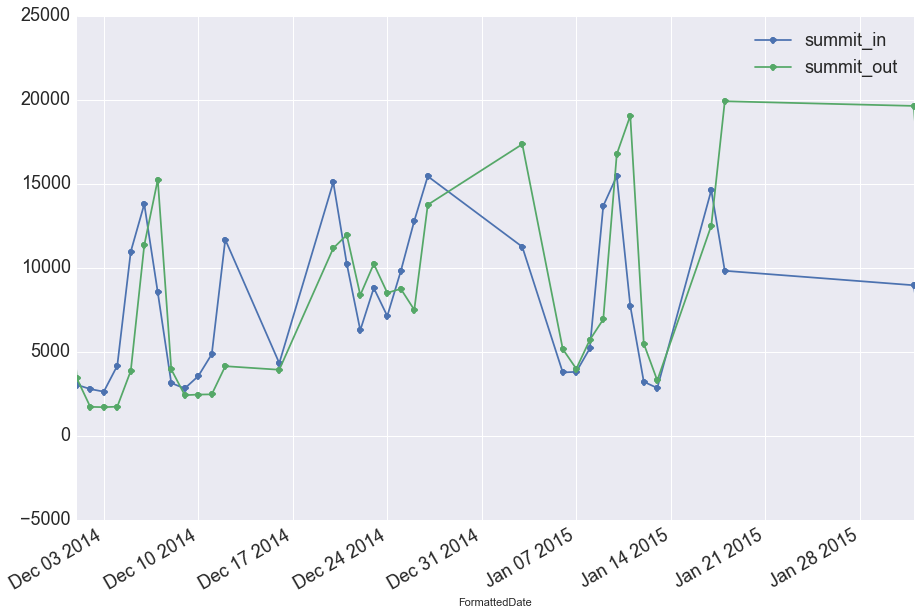

In [286]:
plot_two_lines(df_summit, 'summit_in', 'summit_out', 'summit_in', 'summit_out', ['2014-12-1 00:00:00', '2015-2-1 00:00:00'])